# Bank Marketing Campaign Analysis

Name : Hitakshi Shah

SAP ID : 75011019034

Data Source: UCI - https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

Business Objective - There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients. 

Hence, the objective is to classify the clients on the basis of whether or not, they have subscribed to the term deposit at the bank.


## Analysis on the Dataset :

  
Data Description

Data Cleaning (Missing Value and Outlier Treatment)

Visualizatiion

Feature Engineering

Standardization of Numerical Variables

SMOTE - Oversampling Technique

Modelling (KNN, Logistic Regression and Naive-Bayes)

Logistic Regression with Hyperparameter Tuning

Model Evaluation(Classification Report and ROC Curve)

Conclusion and Recommendations

## Attribute Information

Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-                                    employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Target variable:

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [143]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Basic Data Importing and Description:

In [144]:
#importing our data file "bank.csv" into a pandas dataframe
bank = pd.read_csv('C:/Users/hiteksha/Desktop/bank_marketing.csv', sep = ",")

In [145]:
#data description
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [146]:
bank.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [147]:
print("The shape of the data is:" + str(bank.shape))
print(bank.info())

The shape of the data is:(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64

In [148]:
#for continuous variables
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [149]:
#for categorical variables
bank.describe(exclude = [np.number])

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

## Visualization:

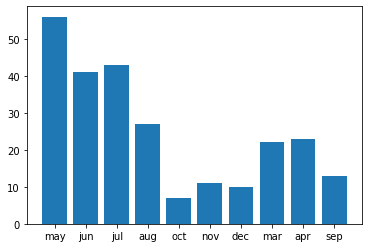

In [150]:
#Barplot between Campaign and Month
fig = plt.bar(bank['month'], bank['campaign'])

Insights :

We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July).
Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children.
They also have made their campaign in the end of the bank period.

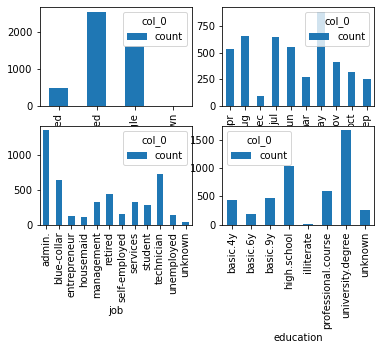

In [151]:
bank_yes = bank[bank['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])   

Insights :
    
Married leads have made high deposits followed by single.

There were much deposist made during may month as it is the start of bank period.

Leads who work in administrative position made deposits followed by technicians and blue collar employees.

Leads who had atleast university degree had made te deposits followed by highschool.

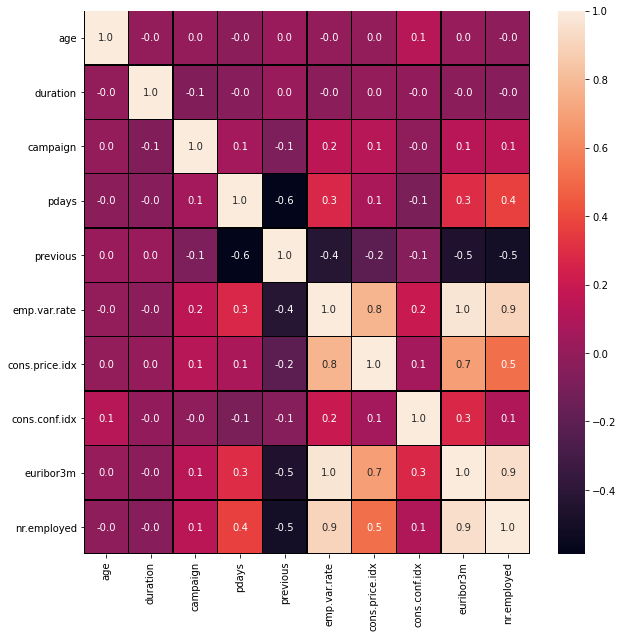

In [152]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Insights:

The indicators have correlation among themselves.
Number of employees rate is highly correlated with employee variation rate.

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate).
Employee variation rate also correlates with the bank interest rates.

## Data Cleaning:

### Missing Value Treatment

In [153]:
#checking for missing values
bank.isna().any().any()

False

Hence, there are no missing values in the dataset to be treated

### Outlier Treatment

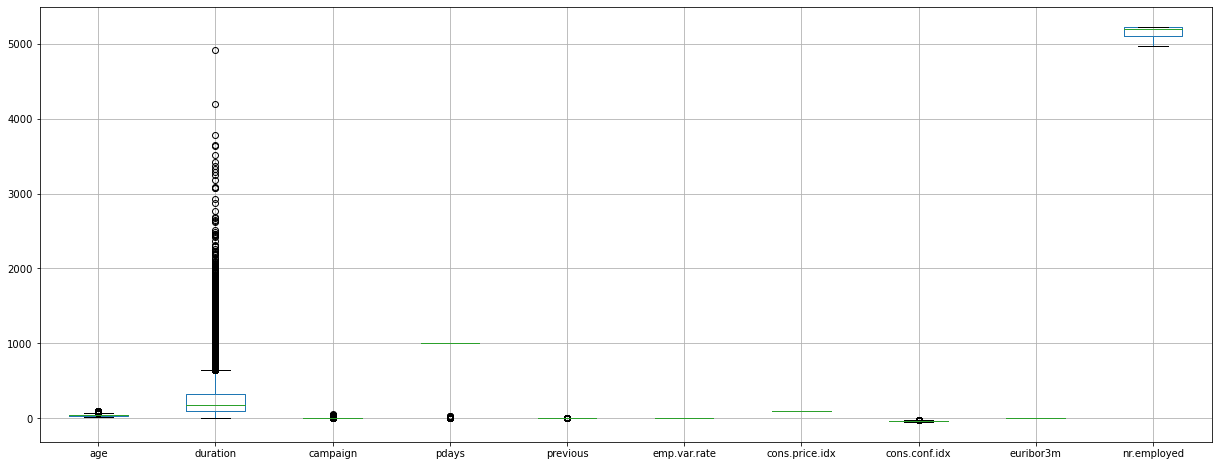

In [154]:
#Checking for outliers
bank.iloc[:,:-1].boxplot(figsize=(21,8))
plt.show()

We see that many features doesn't have much outliers except for age, duration and campaign. So, let's fix only those features using IQR method.

In [155]:
#Outlier Treatment using IQR mwthod
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1  
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR

    bank[cols] = (np.where(bank[cols] >= Upper_Whisker, Upper_Whisker, bank[cols]))
    bank[cols] = (np.where(bank[cols] <= Lower_Whisker, Lower_Whisker, bank[cols]))

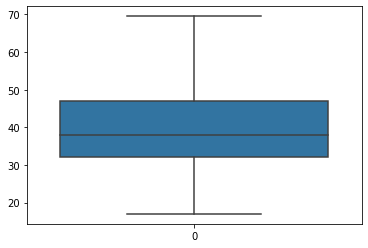

In [156]:
plot_treated1 = sns.boxplot(data = bank['age'])

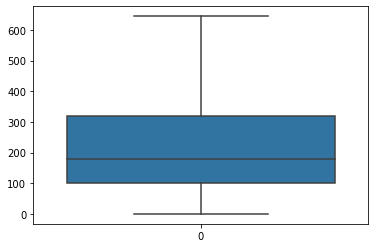

In [157]:
plot_treated2 = sns.boxplot(data = bank['duration'])   

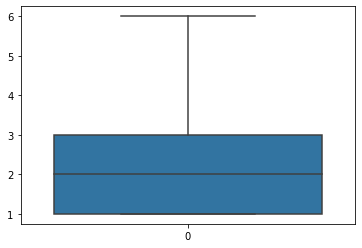

In [158]:
plot_treated3 = sns.boxplot(data = bank['campaign']) 

Thus, all the outliers are treated well using IQR method

## Feature Engineering:

1) Creating a feature middle school using basic.9y, basic.6y, basic.4y

In [159]:
bank_features=bank.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

In [160]:
bank_features['education'].value_counts()

middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

2) Giving the month and day their respective numbers

In [161]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}  
bank_features['month']= bank_features['month'].map(month_dict) 

In [162]:
day_dict={'mon':2,'tue':3,'wed':4,'thu':5,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

In [163]:
bank_features.loc[:, ['month', 'day_of_week']].head()

month  day_of_week
0      5            2
1      5            2
2      5            2
3      5            2
4      5            2

3) Replacing '999' in pdays (number of days that passed by after the client was last contacted 
   from a previous campaign) as '0'

In [164]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0
bank_features['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
19        3
22        3
21        2
20        1
25        1
26        1
27        1
Name: pdays, dtype: int64

4) Encoding the variables which has 'yes', 'no' and 'unknown' as '1','0' and '-1' respectively

In [165]:
dict={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dict)
bank_features['default']=bank_features['default'].map(dict)
bank_features['loan']=bank_features['loan'].map(dict)

In [166]:
dict1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dict1)

In [167]:
bank_features.loc[:,['housing','default','loan','y']].head()

housing  default  loan  y
0        0        0     0  0
1        0       -1     0  0
2        1        0     0  0
3        0        0     0  0
4        0        0     1  0

5) Creating dummy variables for categorical data

In [168]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

dummy_telephone  dummy_nonexistent  dummy_success
0                1                  1              0
1                1                  1              0
2                1                  1              0
3                1                  1              0
4                1                  1              0

6) Frequency encoding for job and education

In [169]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_education=bank_features['education'].value_counts().to_dict()

In [170]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_education)

In [171]:
bank_features.loc[:,['job','education']].tail() 

job  education
41183  1720       5243
41184  9254       5243
41185  1720      12168
41186  6743       5243
41187  1720       5243

7) Target encoding for marital status

In [172]:
bank_features.groupby(['marital'])['y'].mean()
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['married', 'divorced', 'single', 'unknown'], dtype='object', name='marital')

In [173]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'married': 0, 'divorced': 1, 'single': 2, 'unknown': 3}

In [174]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [175]:
bank_features.marital_ordinal.value_counts()

0    24928
2    11568
1     4612
3       80
Name: marital_ordinal, dtype: int64

## Standardization of Numerical Variables

In [176]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']

In [177]:
feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]

In [178]:
scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [179]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

In [180]:
scaled_data.head()

job  education  default  housing  loan  month  day_of_week  y  \
0   1060      12513        0        0     0      5            2  0   
1   3969       9515       -1        0     0      5            2  0   
2   3969       9515        0        1     0      5            2  0   
3  10422      12513        0        0     0      5            2  0   
4   3969       9515        0        0     1      5            2  0   

   dummy_telephone  dummy_nonexistent  ...       age  duration  campaign  \
0                1                  1  ...  1.585559  0.146617 -0.822497   
1                1                  1  ...  1.684283 -0.484899 -0.822497   
2                1                  1  ... -0.290198 -0.050732 -0.822497   
3                1                  1  ...  0.005974 -0.473621 -0.822497   
4                1                  1  ...  1.585559  0.405989 -0.822497   

      pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.164012 -0.349494      0.648092        0.722722       0.886447    0.71246   
1 -0.164012 -0.349494      0.648092        0.722722       0.886447    0.71246   
2 -0.164012 -0.349494      0.648092        0.722722       0.886447    0.71246   
3 -0.164012 -0.349494      0.648092        0.722722       0.886447    0.71246   
4 -0.164012 -0.349494      0.648092        0.722722       0.886447    0.71246   

   nr.employed  
0      0.33168  
1      0.33168  
2      0.33168  
3      0.33168  
4      0.33168  

[5 rows x 22 columns]

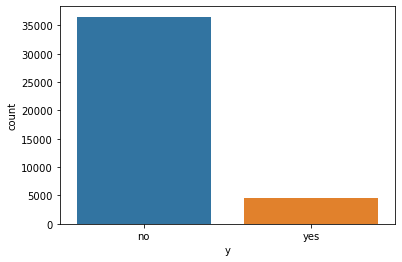

In [181]:
#To find the class dsitribution of clients who have subscribed to the deposit or not
sns.countplot(bank['y'])
plt.show()

In [182]:
X = scaled_data.drop('y', axis = 1)
Y = scaled_data['y']

## SMOTE:

Oversampling
Since, our model's dependent variable has an unequal distribution, our model might benefit 
from an oversampling technique called SMOTE. SMOTE will even out the difference by inserting synthetically produced rows of 
data which fall in between the already existing minority dependent variable.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Deposit(Yes/No)'),
 Text(0.5, 1.0, 'After SMOTE')]

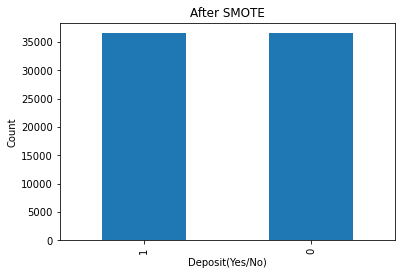

In [183]:
 #SMOTE will fill in the difference.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X,Y)
y_res_df = pd.DataFrame(y_res)
ax = y_res_df.y.value_counts().plot(kind="bar")
ax.set(xlabel="Deposit(Yes/No)", ylabel="Count", title = "After SMOTE")

## Train-Test Splitting

In [184]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (58476, 21)
Input Test: (14620, 21)
Output Training: (58476,)
Output Test: (14620,)


## Modelling

In [185]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
knn_cv=KNeighborsClassifier()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1:'KNN', 2:'Naive Bayes'}
cv_models=[logreg_cv,knn_cv,nb_cv]

In [186]:
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, x_res, y_res, cv=10, scoring ='accuracy').mean()))

C:\Users\hiteksha\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hiteksha\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Test Accuracy: 0.8429279570059511
KNN Test Accuracy: 0.8649523524676489
Naive Bayes Test Accuracy: 0.714898027823576


Thus, KNN Algorithm fits the best for the above dataset followed by Logistic Regression Model.

## Logistic Regression with Hyperparameter Tuning

In [187]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)

C:\Users\hiteksha\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=1.2067926406393288, random_state=0)
The mean accuracy of the model is: 0.8693570451436389


We have got the best parameters for the model and the mean accuracy is 86.94%

In [189]:
logreg = LogisticRegression(C=1.2067926406393288, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


C:\Users\hiteksha\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hence, the accuracy for Logistic Regression has increased after Hyperparameter Tuning. It comes out to be approximately 87%.

## Model Evaluation:

### Classification Report

In [190]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      7369
           1       0.85      0.89      0.87      7251

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



Insights:
    
The Classification report reveals that we have 89% precision which is the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit

### ROC CURVE

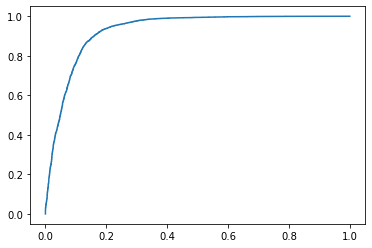

In [191]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

From the ROC curve, we can infer that our logistic model has classified the prospective leads who made deposit correctly rather than predicting false positive. The more the ROC curve(red) lies towards the top left side the better our model is. Thus, we can say that our model performs fairly good.

## Conclusion:

From the EDA and model selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

## Recommendations:

Here are the few recommendations for the bank than can help improve the deposit rate:

Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences.

Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit.

Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history.

Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor.
